In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lo scopo di questa esercitazione è stato quello di prezzare due strumenti finanziari mediante metodi montecarlo. Nello specifico si è stimato il prezzo per le European Call Options e le European Put Options. Nella prima parte dell'esercitazione è stato stimato il prezzo iniziale $P[C(t_0, K)]$ delle opzioni. Per farlo sono state eseguite $10^5$ simulazioni di un moto browniano geometrico in modo da ottenere una stima del prezzo dell'azione al tempo finale (delivery time). Nella seconda parte invece l'intervallo di tempo tra l'istante iniziale e l'istante finale è stato discretizzato in $100$ intervalli ed è stato simulato il prezzo dell'azione ad ognuno di questi istanti di tempo. Si è quindi simulato un moto browniano geometrico discreto costituito da $100$ passi, da cui è stato stimato il prezzo finale delle azioni. È quindi stato calcolato il valore iniziale delle due opzioni. 
Notiamo fin da subito che i due metodi devono pervenire allo stesso risultato in quanto il moto browniano geometrico è un processo stocastico che mostra proprietà di autosimilarità, è cioè un processo in cui ogni parte è statisticamente simile a una qualunque sua sottoparte. Questa proprietà implica che un processo autosimile costituito da un unico passo "lungo" T è statisticamente analogo allo stesso processo costituito da 100 passi ognuno "lungo" 0.01 T.

I parametri utlizzati nelle due simulazioni sono i seguenti:
- prezzo dell'azione a $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatilità: $\sigma=0.25$

In entrambe le simulazioni è stato utilizzato il metodo dei blocchi per calcolare l'incertezza sul prezzo iniziale delle opzioni usando $100$ blocchi. Di seguito mostriamo i grafici dei valori dei prezzi ottenuti al variare del numero dei blocchi.

In [2]:
db_call1=pd.read_csv('Call1', sep=' ', header=None)
db_put1=pd.read_csv('Put1', sep=' ', header=None)
db_call2=pd.read_csv('Call2', sep=' ', header=None)
db_put2=pd.read_csv('Put2', sep=' ', header=None)

In [3]:
db_call=pd.DataFrame(columns= ['price direct', 'uncert direct', 'price discreet', 'uncert discreet'])
db_call['price direct']=list(db_call1.iloc[:,0])
db_call['uncert direct']=list(db_call1.iloc[:,1])
db_call['price discreet']=list(db_call2.iloc[:,0])
db_call['uncert discreet']=list(db_call2.iloc[:,1])

db_put=pd.DataFrame(columns= ['price direct', 'uncert direct', 'price discreet', 'uncert discreet'])
db_put['price direct']=list(db_put1.iloc[:,0])
db_put['uncert direct']=list(db_put1.iloc[:,1])
db_put['price discreet']=list(db_put2.iloc[:,0])
db_put['uncert discreet']=list(db_put2.iloc[:,1])

In [4]:
blocchi=100
Nblocchi = []
for i in range(0, blocchi):
    Nblocchi.append(i)

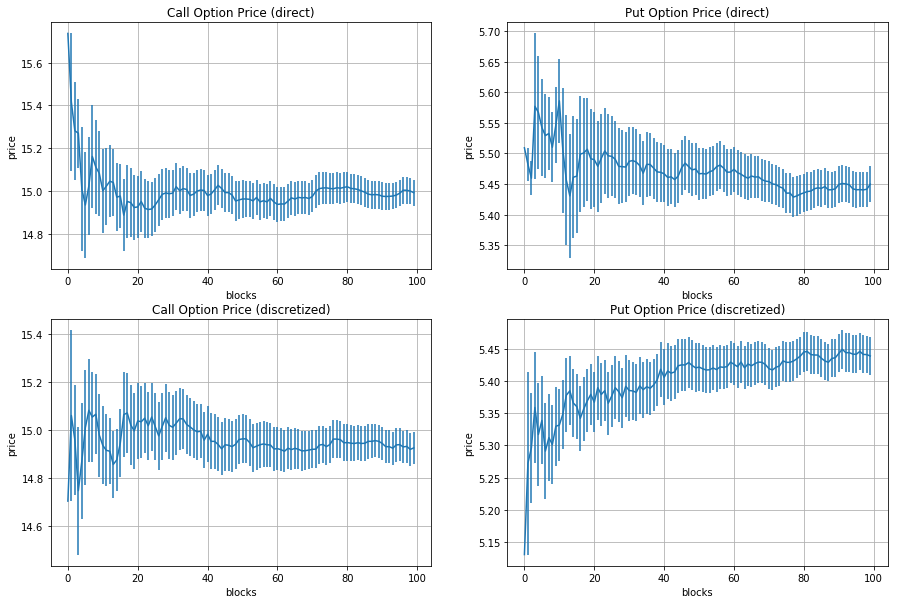

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.errorbar(Nblocchi,db_call.iloc[:,0], yerr=db_call.iloc[:,1])
plt.xlabel('blocks')
plt.ylabel('price')
plt.title('Call Option Price (direct)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.errorbar(Nblocchi, db_put1.iloc[:,0], yerr=db_put.iloc[:,1])
plt.xlabel('blocks')
plt.ylabel('price')
plt.title('Put Option Price (direct)')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.errorbar(Nblocchi, db_call.iloc[:,2], yerr=db_call.iloc[:,3])
plt.xlabel('blocks')
plt.ylabel('price')
plt.title('Call Option Price (discretized)')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.errorbar(Nblocchi, db_put.iloc[:,2], yerr=db_put.iloc[:,3])
plt.xlabel('blocks')
plt.ylabel('price')
plt.title('Put Option Price (discretized)')
plt.grid(True)

I risultati mostrati precedentemente vanno confrontati con la formula esatta di Black-Scholes che prevede (con i parametri scelti) per la Call Option un prezzo di 14.97 e per la Put Option un prezzo di 5.46. Come si può notare per entrambi i prodotti finanziari e per entrambi i metodi utilizzati i risultati sono in accordo con la formula analitica.